# 2025-2 INSIGHT 4차 심화세션 사전학습 과제
## 딥러닝 ③ Focus on TRANSFORMER

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> RNN/LSTM의 한계 </span>

기존 순환 신경망(RNN)과 이를 개선한 LSTM, GRU가 자연어 처리(NLP)를 지배했으나, 근본적인 구조적 문제점이 존재함.

## 주요 문제점

장기 의존성 문제 (Long-term Dependency)
<br>
- 현상: 문장의 길이가 길어질수록 앞부분의 정보가 뒷부분까지 전달되지 못하고 희석됨.
<br>
- 원인: 정보가 매 time step마다 압축되고 전달되는 과정에서 Gradient Vanishing(기울기 소실) 발생. LSTM이 이를 어느 정도 해결했으나, 아주 긴 시퀀스에서는 여전히 한계가 있음.

병렬 처리 불가능 (No Parallelization)
<br>
- 현상: $t$ 시점의 연산을 위해서는 반드시 $t-1$ 시점의 계산이 완료되어야 함.
<br>
- 결과: GPU의 강력한 병렬 연산 능력을 100% 활용하지 못하여 학습 속도가 매우 느림.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 트랜스포머의 핵심 원리 </span>

오직 Attention 매커니즘만으로 입출력 간의 의존성을 학습하는 구조
<br>
재귀나 합성곱이 필요 없다

핵심 특징
<br>
- 병렬화: 순차적 계산이 아닌, 행렬 연산을 통해 문장 전체를 한 번에 처리.
- 전역 의존성: 문장 내 단어 간의 거리에 상관없이 모든 단어 간의 관계를 1:1로 직접 참조 가능.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> Self - Attention </span>

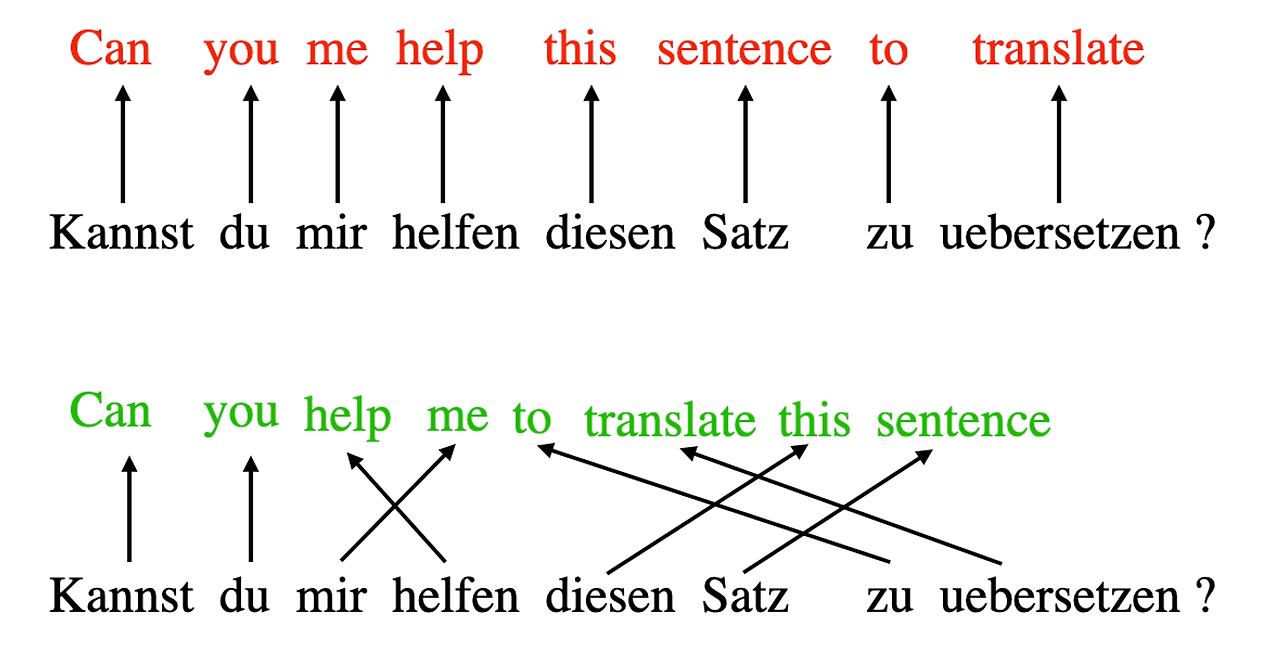

‘attention’이라는 컨셉은 사실 RNN로부터 유래했다고 할 수 있는데, 목적은 긴 sequence와 sentences를 다루기 위한 것이다. 언어를 다른 언어로 번역하는 경우를 예로 들면, 단어 하나씩만 따로 번역하는 것은 말이 안되는게, 언어마다 고유한 문법이 있고 문맥이 있기 때문이다. 따라서 그렇게 번역을 하면 부정확하고, 말이 안되는 문장이 나올것이다. (빨간 글씨가 이 방식에 해당)

이 문제를 해결하기 위해, attention 매커니즘은 모든 sequence 각 time step마다 요소들이 서로 접근할 수 있는 방법을 소개한다. 핵심은 특정 context에서 무엇이 더 중요한지 선택하고 결정하는 것이다. 여기서 self-attention은 RNN을 필요성을 대체해버린다.
<br>
<br>
self-attention은 input embedding으로 하여금 보다 input의 문맥정보를 더 잘 포함하도록 해주는 메커니즘이라고 할 수 있음!

```python
self-attention은 모델이 input sequence로부터 각 요소(단어)의 중요성에 무게를 둬서 output에 다이나믹하게 영향을 줄 수 있도록 한다.

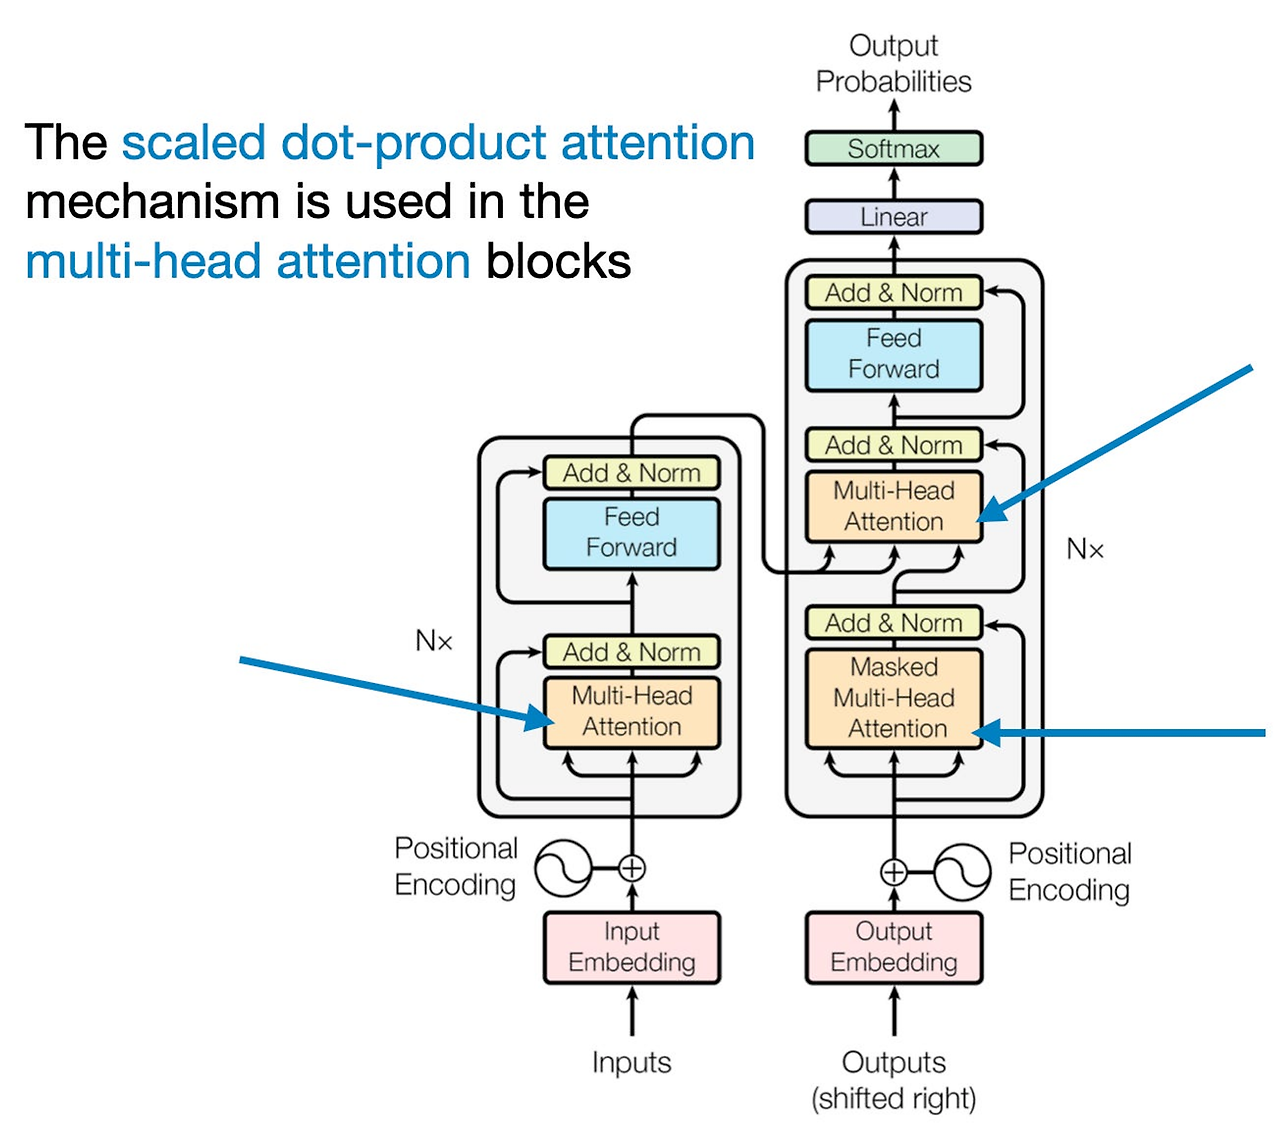

트랜스포머의 심장에 해당하는 메커니즘. "단어가 문장 내의 다른 단어들과 어떤 연관이 있는가?"를 계산함.

```
Query, Key, Value (Q, K, V)

데이터베이스 검색 시스템에서 아이디어를 차용.
<br>
- Query: "내가 찾으려는 정보가 뭐냐?" (현재 분석 중인 단어의 벡터)
- Key: "정보를 찾기 위한 인덱스/라벨" (다른 단어들 식별 벡터)
- Value: "실제 내용물" (다른 단어들의 실제 의미 벡터)
  

```
Cross Attention vs. Self-Attention

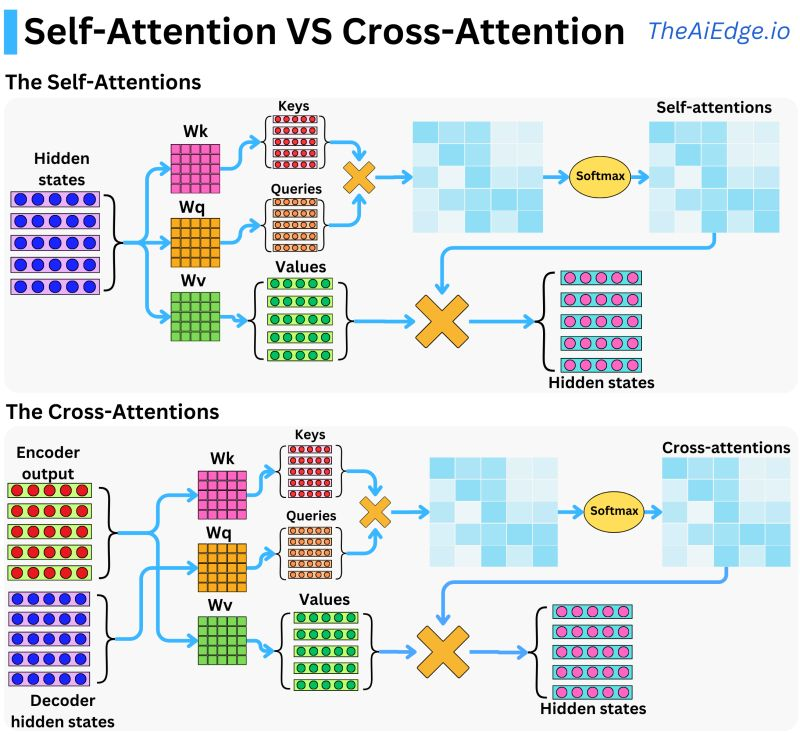

```
Scaled Dot-Product Attention


$$Attention(Q, K, V) = \text{softmax}\left(\frac{Q K^T}{\sqrt{d_k}}\right) V$$

1. $Q K^T$ (Dot Product): Query와 Key의 내적. 벡터 간의 유사도를 구함. 값이 클수록 연관성이 높음.
2. Scale ($\frac{1}{\sqrt{d_k}}$): $d_k$는 Key 벡터의 차원 수. 내적 값이 너무 커지면 Softmax 함수에서 기울기가 0에 가까워지는(Vanishing Gradient) 현상을 방지하기 위해 나누어 줌.
3. Softmax: 유사도를 확률값(0~1, 합은 1)으로 변환.
4. Weighted Sum ($... \times V$): 확률값을 가중치로 하여 Value 벡터들을 가중 합산.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 트랜스포머의 전처리 과정 </span>

```
Positional Encoding

트랜스포머는 문장을 한 번에(병렬로) 입력받으므로, 단어의 순서 정보(Order)를 알지 못함. (RNN은 순서대로 넣으므로 자연스럽게 앎). 따라서 단어의 위치 정보를 벡터에 더해줘야 함.

- 원리: 각 단어의 임베딩 벡터에 위치별로 고유한 패턴을 가진 값을 더함
- 함수: 사인과 코사인 함수를 주기별로 섞어서 사용

$$PE_{(pos, 2i)} = \sin(pos / 10000^{2i/d_{model}}) \\
PE_{(pos, 2i+1)} = \cos(pos / 10000^{2i/d_{model}})$$


이처럼 학습 가능한 파라미터가 아니라 고정된 수식을 사용하여 어떤 길이의 문장이 와도 처리가 가능하게 함!

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 트랜스포머의 인코더/디코더 구조 </span>

```
Multi-Head Attention

= 한번만 어텐션을 수행하는 것보다 여러 번 수행해서 합치는 게 더 좋다

- 입력된 벡터 $d_{model}$을 $h$개의 헤드(Head)로 쪼개서 서로 다른 $Q, K, V$ 가중치 행렬($W^Q, W^K, W^V$)을 학습시킴.
- 각각 계산된 어텐션 결과(Head)를 이어 붙인(Concat) 후 다시 $W^O$ 행렬과 곱함.

이를 통해
<br>
- 다양한 관점 학습: 하나의 헤드가 문법적인 관계를 본다면, 다른 헤드는 의미적인 관계를 보는 등 다양한 특징을 동시에 포착 가능.
- 앙상블 효과: 서로 다른 부분공간(Subspace)의 정보를 결합하여 성능 향상.
<br>
<br>
라는 장점을 가지게 된다.

```
Masked Multi-Head Attention (Decoder Only)

디코더의 첫 번째 서브 레이어에서만 사용됨!

- 문제: 학습 시 디코더에는 정답(Target) 문장이 입력되는데, 셀프 어텐션을 그냥 수행하면 $t$ 시점의 단어를 예측할 때 $t+1$ 이후의 미래 단어를 미리 참조(Cheating)하게 됨.
- 해결: 현재 시점($t$)보다 뒤에 있는 단어들의 어텐션 스코어를 $-\infty$로 마스킹 처리.
- 결과: Softmax를 거치면 0이 되어 미래의 단어 정보는 반영되지 않음.

```
Encoder-Decoder Attention

디코더의 두 번째 서브 레이어

- 역할: 번역 등의 작업을 할 때, 번역할 문장(Decoder)이 원문(Encoder)의 어느 부분을 집중해서 봐야 하는지를 결정.
- 구조:
  - Query: 디코더의 이전 레이어 출력 (현재 번역하려는 문맥)
  - Key, Value: 인코더의 최종 출력 (원문의 전체 문맥 정보)

```
Scaled Dot-Product Attention 구현

$Attention(Q, K, V) = \text{softmax}\left(\frac{Q K^T}{\sqrt{d_k}}\right) V$

In [3]:
def scaled_dot_product_attention(query, key, value, mask=None):
    """
    query, key, value: (Batch_Size, n_head, Seq_Len, d_k)
    mask: 패딩이나 미래 시점을 가리기 위한 마스크
    """
    
    # 1. d_k (key 벡터의 차원 크기) 구하기 - 스케일링을 위해 필요
    d_k = query.size(-1) 
    
    # 2. Score 계산: Q와 K의 내적 (Matmul)
    # key.transpose(-2, -1)은 K의 전치행렬(T)을 만드는 과정
    scores = torch.matmul(query, key.transpose(-2, -1)) 
    
    # 3. Scale: 루트 d_k로 나누어주기 (Gradient Vanishing 방지)
    scores = scores / math.sqrt(d_k)
    
    # 4. Masking (옵션): 필요한 경우 마스킹 처리 (점수를 -무한대로 보냄)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)
        
    # 5. Softmax: 점수를 확률값(0~1)으로 변환
    attn_probs = F.softmax(scores, dim=-1)
    
    # 6. Weighted Sum: 확률값과 Value를 곱해서 최종 문맥 벡터 생성
    output = torch.matmul(attn_probs, value)
    
    return output, attn_probs

```
전체 Encoder Layer의 구조

In [4]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, n_head, d_ff, dropout=0.1):
        super(EncoderLayer, self).__init__()
        
        # 1. Self-Attention 서브 레이어
        self.self_attn = MultiHeadAttention(d_model, n_head)
        self.norm1 = nn.LayerNorm(d_model) # Layer Normalization
        
        # 2. Feed Forward 서브 레이어
        self.ffn = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        # --- 첫 번째 서브 레이어 (Attention + Add & Norm) ---
        # 1. Attention 수행 (Self Attention이므로 Q=K=V=x)
        attn_output, _ = self.self_attn(x, x, x, mask)
        
        # 2. Residual Connection (입력 x를 더함) & Normalization
        x = self.norm1(x + self.dropout(attn_output))
        
        # --- 두 번째 서브 레이어 (FFN + Add & Norm) ---
        # 3. Feed Forward 수행
        ffn_output = self.ffn(x)
        
        # 4. Residual Connection & Normalization
        x = self.norm2(x + self.dropout(ffn_output))
        
        return x

NameError: name 'nn' is not defined

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 세줄요약 </span>

트랜스포머의 데이터 흐름은 다음과 같다.
<br>
1. Input: 단어 임베딩 + Positional Encoding
<br>
2. Encoder: Multi-Head Self-Attention → Feed Forward Network (반복)
<br>
3. Decoder: Masked Self-Attention → Encoder-Decoder Attention → Feed Forward Network (반복)
<br>
4. Output: Linear → Softmax → 단어 확률 예측